In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.1 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from imblearn import over_sampling

Before  (array([0, 1]), array([425,  75]))
After  (array([0, 1]), array([425, 425]))


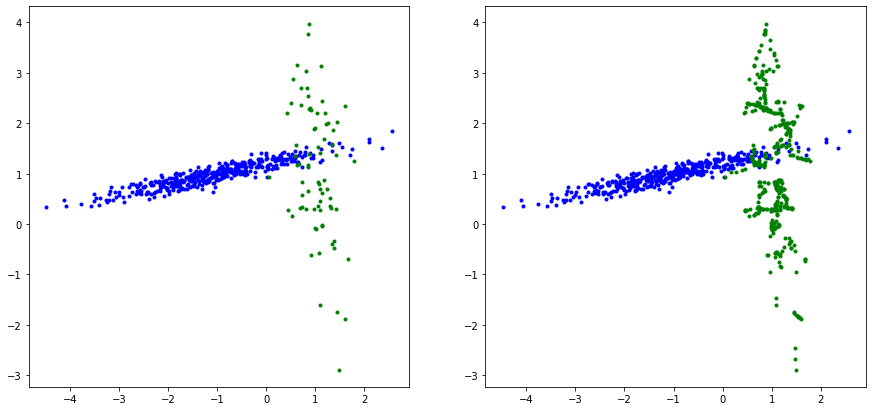

In [12]:
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, weights=[0.8, 0.1], class_sep=1.0,
    flip_y=0,
    random_state=29
)
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')

sm = over_sampling.SMOTE(random_state=42)
print('Before ', np.unique(y, return_counts=True))
X_res, y_res = sm.fit_resample(X, y)
print('After ', np.unique(y_res, return_counts=True))

plt.subplot(1,2,2)
plt.plot(X_res[:,0][y_res == 0], X_res[:,1][y_res == 0], 'b.')
plt.plot(X_res[:,0][y_res == 1], X_res[:,1][y_res == 1], 'g.')
plt.show()

Accuracy for Imbalanced Logistic Regression: 0.93
Accuracy for Balanced Logistic Regression: 0.9588235294117647


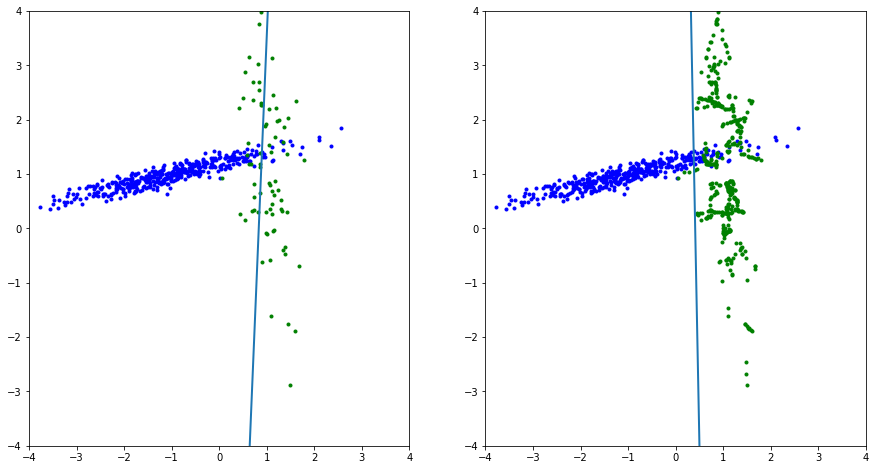

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logreg_imbalanced = LogisticRegression(random_state=42) 
logreg_imbalanced.fit(X_train, y_train)
y_pred_imbalanced = logreg_imbalanced.predict(X_test)
title = "Imbalanced Logistic Regression"
print(f"Accuracy for {title}: {accuracy_score(y_test, y_pred_imbalanced)}")

theta0 = logreg_imbalanced.intercept_[0]
theta1 = logreg_imbalanced.coef_[0][0]
theta2 = logreg_imbalanced.coef_[0][1]

m = - (theta1/theta2)
c = - (theta0/theta2)

x1 = np.arange(-5, 5, 0.2)
x2  = m * x1 + c
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.plot(x1,x2, linewidth = '2')
plt.axis([-4,4,-4,4])


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)
logreg_balanced = LogisticRegression(random_state=42)
logreg_balanced.fit(X_train, y_train)
y_pred_balanced = logreg_balanced.predict(X_test)
title = "Balanced Logistic Regression"
print(f"Accuracy for {title}: {accuracy_score(y_test, y_pred_balanced)}")


theta0 = logreg_balanced.intercept_[0]
theta1 = logreg_balanced.coef_[0][0]
theta2 = logreg_balanced.coef_[0][1]

m = - (theta1/theta2)
c = - (theta0/theta2)

x1 = np.arange(-5, 5, 0.2)
x2  = m * x1 + c
plt.subplot(1,2,2)
plt.plot(X_res[:,0][y_res == 0], X_res[:,1][y_res == 0], 'b.')
plt.plot(X_res[:,0][y_res == 1], X_res[:,1][y_res == 1], 'g.')
plt.plot(x1,x2, linewidth = '2')

plt.axis([-4,4,-4,4])
plt.show()